<a href="https://colab.research.google.com/github/ayush-kumar-rai/ayush-kumar-rai/blob/main/CI%2C_Residual_analysis%2C_example_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib as mpl 
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression 
from scipy import stats 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('C:/Users/Somi/Documents/lrm.xlsx')
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Somi/Documents/lrm.xlsx'

In [ ]:
data.plot('Student Population', 'Sales', style='o') 
plt.ylabel('pizza sales') 
plt.title('Sales in Armand’s Pizza Parlor ') 
plt.show() 

In [ ]:
import statsmodels.api as s
St_pop = data['Student Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = sm.OLS(sales,st_pop)
result1 = model1.fit()
print(result1.summary())

NameError: name 'data' is not defined

In [ ]:
data = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Student Population','Sales'])
data.columns = ['id', 'variables', 'value']
data

,id,variables,value
0,0,Student Population,2
1,1,Student Population,6
2,2,Student Population,8
3,3,Student Population,8
4,4,Student Population,12
5,5,Student Population,16
6,6,Student Population,20
7,7,Student Population,20
8,8,Student Population,22
9,9,Student Population,26


In [ ]:
model = sm.ols('value ~ C(variables)', data=data).fit()
anova_table = s.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variables),1.0,67280.0,67280.000000,74.30605,8.329794e-08
Residual,18.0,16298.0,905.444444,NaN,NaN


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = data['Student Population'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [ ]:
reg= LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In [ ]:
reg.predict(10)

array([[110.]])

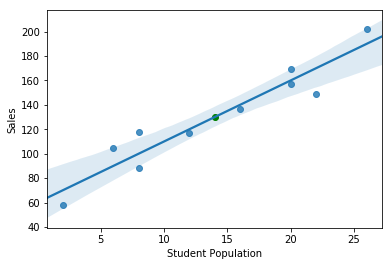

In [ ]:
x = data['Student Population']
y = data['Sales']
plt.figure()
sns.regplot(x,y,fit_reg= True)
plt.scatter(np.mean(x), np.mean(y), color = "green")

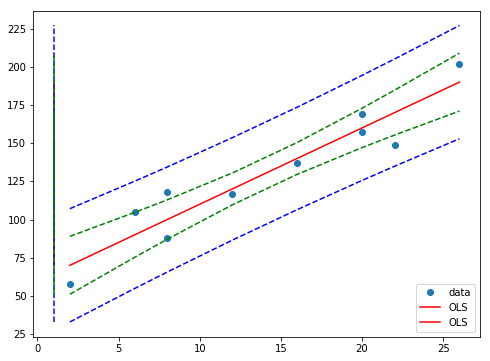

In [ ]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(result1, alpha=0.05)
fittedvalues = data1[:,2]
predict_mean_se  = data1[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:,4:6].T
predict_ci_low, predict_ci_upp = data1[:,6:8].T

In [ ]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [ ]:
 predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [ ]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [ ]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

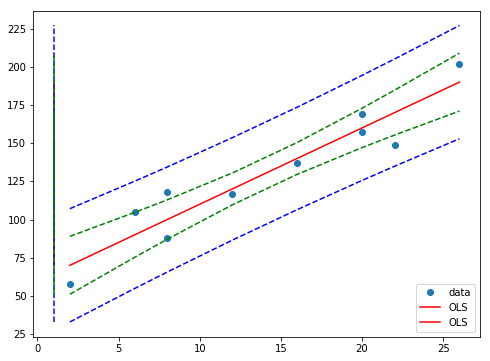

In [ ]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(X, fittedvalues, 'r-', label='OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc='best');
plt.show()

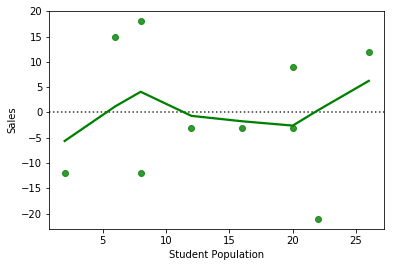

In [ ]:
import seaborn as sns
sns.residplot(x, y, lowess=True, color="g")

SyntaxError: invalid syntax (<unknown>, line 1)

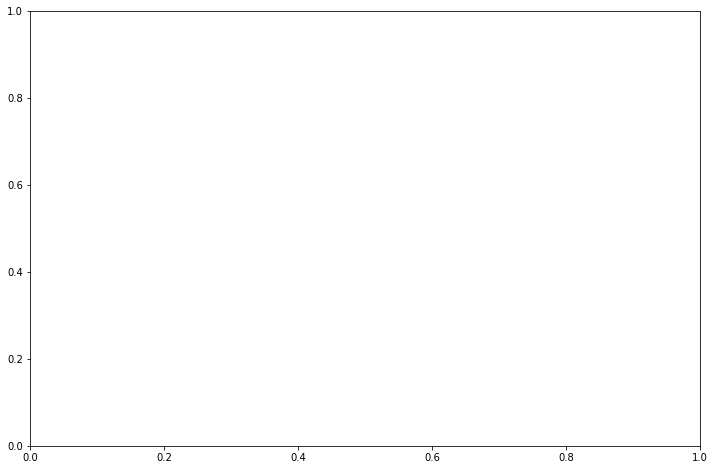

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = s.graphics.plot_partregress("data", 'Student Population', ["Student Population", "Sales"], data=data, ax=ax)

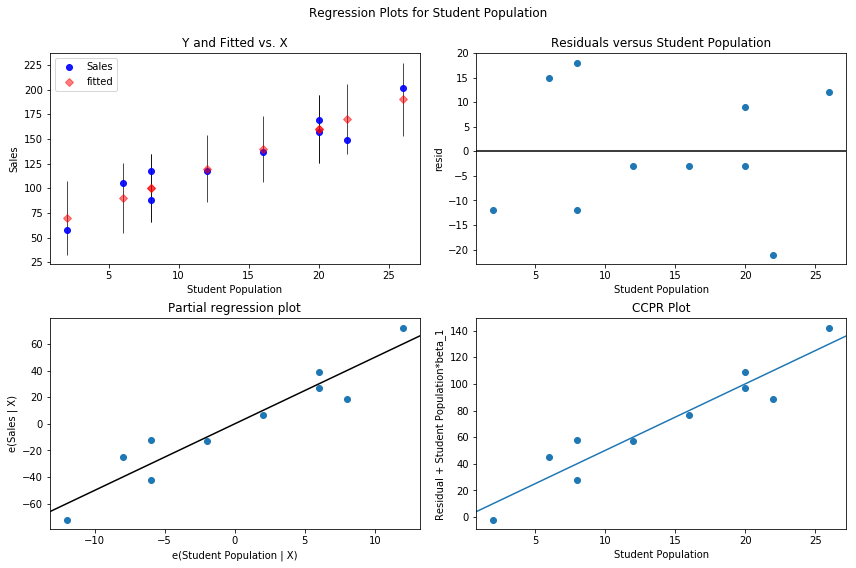

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = s.graphics.plot_regress_exog(result1, "Student Population", fig=fig)

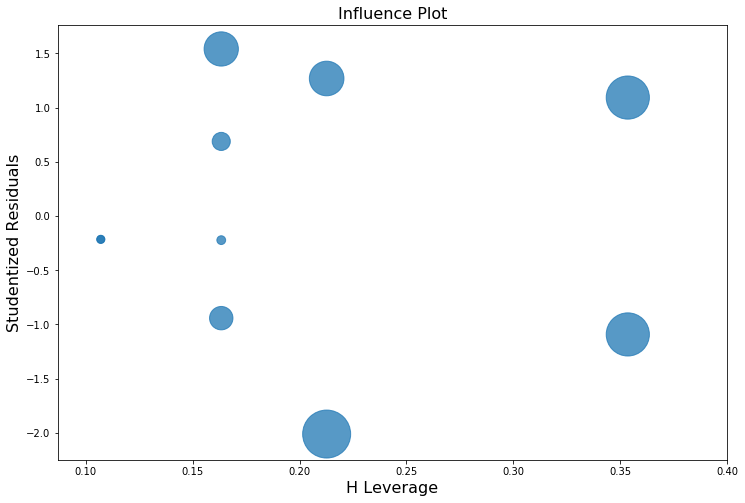

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = s.graphics.influence_plot(result1, alpha  = 0.05, ax = ax, )

In [ ]:
influence = result1.get_influence() 
resid_student = influence.resid_studentized_external

In [ ]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

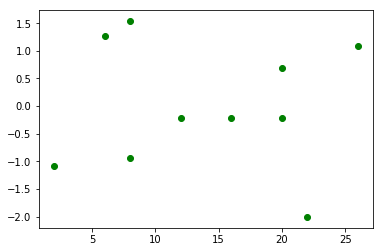

In [ ]:
plt.figure()
plt.scatter(x,resid_student, color = "green")

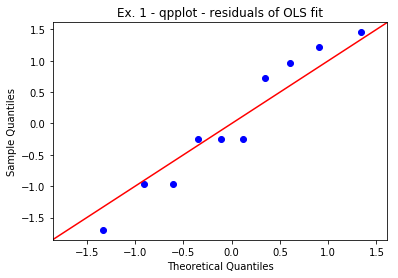

In [ ]:
res = result1.resid # residuals
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('Ex. 1 - qpplot - residuals of OLS fit') 
plt.show()